# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Topic Modelling
import gensim
from gensim import corpora, models
from gensim.models import LsiModel
from gensim.models.ldamodel import LdaModel


from pipeline import TopicModelling, DocumentClustering
from utils import text_prep_func, get_topic_keywords

# Train file data preprocessing

In [2]:
trainfile = pd.read_csv('data/drugsComTrain_raw.csv')
trainfile['year'] = pd.DatetimeIndex(trainfile['date']).year

### LSA Modelling

In [ ]:
lsi_best_n_selection = TopicModelling.BestTopicNumSelection(15, 45, 5, LsiModel, 'bow')
k_scores, _ = lsi_best_n_selection.initiate_process(trainfile, 'review')
print(k_scores)

In [ ]:
best_lsi_model, best_n, best_score = best_n_selection.get_optimal_selection()

In [ ]:
lsi_best_n_selection.scores_line_plot()

## BOW Model

### LDA Modeling

In [3]:
best_n_selection = TopicModelling.BestTopicNumSelection(15, 45, 5, LdaModel, 'bow')

In [4]:
k_scores, _ = best_n_selection.initiate_process(trainfile, 'review')
print(k_scores)

[0.49797000080607856, 0.49871941672775816, 0.48879900542080074, 0.4923896256691061, 0.47758995122898124, 0.46669265335963195, 0.4533642322879289]


In [5]:
best_model, best_n, best_score = best_n_selection.get_optimal_selection()

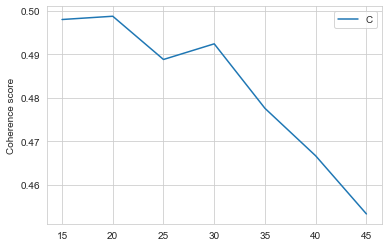

In [6]:
best_n_selection.scores_line_plot()

### Topic Modelling with best number of topics

In [7]:
topic_modelling = TopicModelling(trainfile, best_model)
topic_modelling.fit_corpus('review', 'bow')
topic_modelling.generate_topics()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,"""year""","""feel""","""day""","""migraine""","""day""","""pain""","""water""","""day""","""mg""","""period""","""infection""","""anxiety""","""weight""","""year""","""skin""","""effect""","""day""","""quot""","""weight""","""night"""
1,"""drug""","""effect""","""would""","""insurance""","""product""","""back""","""drink""","""sugar""","""day""","""pill""","""pain""","""depression""","""lb""","""blood""","""acne""","""side""","""took""","""amp""","""month""","""sleep"""
2,"""life""","""side""","""never""","""year""","""use""","""severe""","""taste""","""c""","""take""","""month""","""surgery""","""life""","""lost""","""doctor""","""face""","""week""","""pill""","""day""","""gained""","""take"""
3,"""month""","""like""","""like""","""injection""","""burning""","""stomach""","""good""","""blood""","""dose""","""control""","""neck""","""year""","""eat""","""back""","""month""","""first""","""hour""","""prescribed""","""gain""","""hour"""
4,"""medication""","""taking""","""doctor""","""work""","""infection""","""day""","""drinking""","""pad""","""taking""","""birth""","""nerve""","""feel""","""pound""","""pressure""","""clear""","""taking""","""got""","""symptom""","""mood""","""day"""
5,"""treatment""","""better""","""could""","""tried""","""sore""","""take""","""bottle""","""con""","""work""","""day""","""sinus""","""medication""","""week""","""patch""","""week""","""day""","""week""","""doctor""","""shot""","""morning"""
6,"""effect""","""feeling""","""drug""","""month""","""used""","""hour""","""dose""","""level""","""time""","""first""","""antibiotic""","""mg""","""started""","""old""","""using""","""month""","""time""","""uti""","""sex""","""time"""
7,"""since""","""work""","""felt""","""cost""","""itching""","""took""","""procedure""","""erection""","""daily""","""get""","""ear""","""panic""","""month""","""heart""","""started""","""started""","""work""","""spasm""","""swing""","""get"""
8,"""side""","""medicine""","""one""","""expensive""","""cold""","""diarrhea""","""bad""","""time""","""help""","""cramp""","""relief""","""attack""","""eating""","""month""","""year""","""experienced""","""later""","""prep""","""year""","""taking"""
9,"""doctor""","""make""","""time""","""pay""","""eye""","""relief""","""cough""","""pro""","""dosage""","""year""","""bladder""","""like""","""appetite""","""ago""","""get""","""nausea""","""review""","""dr""","""bleeding""","""bed"""


In [8]:
topic_modelling.assign_topic()
trainfile.head()

Topic assigned for all documents :)


,uniqueID,drugName,condition,review,rating,date,usefulCount,year,LDA_topic_assigned
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2012,15
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2010,15
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,2009,9
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2015,9
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2016,19


In [9]:
topic_modelling.visualize_topics(20)

/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.105114  0.168852       1        1  12.347168
15     0.020292 -0.093218       2        1   9.348519
11     0.054616  0.108564       3        1   8.622159
2      0.001667  0.057753       4        1   6.738565
19    -0.137022  0.005974       5        1   6.314323
16    -0.078757  0.309434       6        1   5.732422
0      0.319120  0.031575       7        1   5.402377
8     -0.209738 -0.090709       8        1   5.255733
14     0.153100  0.141090       9        1   4.892530
5     -0.148793 -0.255477      10        1   4.450533
18    -0.306249  0.146195      11        1   4.119331
13     0.242400 -0.015386      12        1   3.879795
12    -0.250515  0.235138      13        1   3.848681
1      0.012063 -0.248970      14        1   3.792540
3      0.270743 -0.158305      15        1   3.606493
7      0.318021  0.229951      16        1   3.058324
17     0.126627  0.358509      17        1   2.976661
4      0.185734 -0.289635      18        1   2.842891
6     -0.407494 -0.166062      19        1   1.612829
10    -0.060702 -0.475273      20        1   1.158126, topic_info=           Term          Freq         Total Category  logprob  loglift
331        pain  50924.000000  50924.000000  Default  20.0000  20.0000
4            mg  48137.000000  48137.000000  Default  19.0000  19.0000
2        effect  57933.000000  57933.000000  Default  18.0000  18.0000
6          side  55639.000000  55639.000000  Default  17.0000  17.0000
376        quot  22624.000000  22624.000000  Default  16.0000  16.0000
..          ...           ...           ...      ...      ...      ...
331        pain   3572.636729  50924.262114  Topic20  -3.0429   1.8013
798      relief   1412.491727   7646.344730  Topic20  -3.9709   2.7695
139       great   1212.126163  19715.621022  Topic20  -4.1239   1.6693
383      worked    949.302730  15758.205915  Topic20  -4.3683   1.6490
236  prescribed    843.160993  15912.417977  Topic20  -4.4868   1.5207

[973 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2022      9  0.998647    abdomen
2131     10  0.998844  abdominal
203       3  0.999407    abilify
4863     16  0.996505   abnormal
4863     17  0.001703   abnormal
...     ...       ...        ...
3582      2  0.985612        zap
3582      5  0.013072        zap
239       3  0.999234     zoloft
239       8  0.000290     zoloft
1486     14  0.997326    zyprexa

[3880 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 16, 12, 3, 20, 17, 1, 9, 15, 6, 19, 14, 13, 2, 4, 8, 18, 5, 7, 11])

## TF-IDF Vectorizer

### LDA Modelling

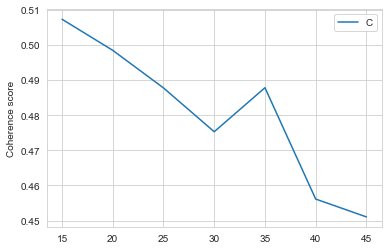

In [11]:
best_n_selection = TopicModelling.BestTopicNumSelection(15, 45, 5, LdaModel, 'tfidf')
scores, _ = best_n_selection.initiate_process(trainfile, 'review')
best_model, best_n, best_score = best_n_selection.get_optimal_selection()
best_n_selection.scores_line_plot()

In [ ]:
print(best_n, best_score)

### Topic Modelling with best number of topics

In [13]:
topic_modelling = TopicModelling(trainfile, best_model)
topic_modelling.fit_corpus('review', 'tfidf')
topic_modelling.generate_topics()

Topic assigned for all documents :)


In [ ]:
topic_modelling.assign_topic()

In [14]:
topic_modelling.visualize_topics(20)

/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.129863 -0.063516       1        1  14.338200
7      0.014440 -0.040248       2        1   9.549221
6     -0.103894  0.098605       3        1   9.050684
13     0.082678 -0.083763       4        1   8.939415
9      0.340256 -0.092713       5        1   6.979976
3      0.209800 -0.007752       6        1   6.327390
2      0.211039  0.157358       7        1   6.219252
11     0.169268 -0.231206       8        1   6.131821
0     -0.280276 -0.116433       9        1   5.764990
8     -0.174518 -0.247165      10        1   5.057180
12    -0.139985  0.274332      11        1   4.696049
14    -0.320674  0.093291      12        1   4.595998
4      0.076933  0.207820      13        1   4.461536
5     -0.031247 -0.304605      14        1   4.083493
10     0.076044  0.355994      15        1   3.804795, topic_info=       Term         Freq        Total Category  logprob  loglift
2    effect  5675.000000  5675.000000  Default  20.0000  20.0000
6      side  5459.000000  5459.000000  Default  19.0000  19.0000
331    pain  6592.000000  6592.000000  Default  18.0000  18.0000
89   period  4642.000000  4642.000000  Default  17.0000  17.0000
282  weight  3330.000000  3330.000000  Default  16.0000  16.0000
..      ...          ...          ...      ...      ...      ...
310    want   192.457902  1288.142881  Topic15  -5.0712   1.3678
58    tried   203.461572  2207.905815  Topic15  -5.0156   0.8846
118    time   208.359882  6495.057894  Topic15  -4.9918  -0.1706
232     one   199.724365  3991.154494  Topic15  -5.0341   0.2740
38     last   194.476526  2412.119025  Topic15  -5.0608   0.7510

[765 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2022     12  0.996319   abdomen
203       8  0.004049   abilify
203      15  0.995962   abilify
4863      5  0.995361  abnormal
5482     13  1.004070    abreva
...     ...       ...       ...
164      15  0.085021      year
807      10  1.000681     yeast
2387     10  1.002418        yi
2015      7  0.989211    zofran
239       4  0.999306    zoloft

[2514 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 7, 14, 10, 4, 3, 12, 1, 9, 13, 15, 5, 6, 11])

/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-

# Yearwise Data Segregation

In [4]:
trainfile['prep_review']=trainfile['review'].apply(text_prep_func)
trainfile.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,LDA_topic_assigned,prep_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2012,3,side effect take combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2010,9,son halfway fourth week intuniv became concern...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,2009,8,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2015,8,first time using form birth control glad went ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2016,9,suboxone completely turned life around feel he...


In [5]:
year_wise_data = {}
years = np.sort(trainfile['year'].unique())
for year in years:
    year_wise_data["reviews{0}".format(year)] = trainfile[trainfile['year'] == year]
print(year_wise_data.keys())

dict_keys(['reviews2008', 'reviews2009', 'reviews2010', 'reviews2011', 'reviews2012', 'reviews2013', 'reviews2014', 'reviews2015', 'reviews2016', 'reviews2017'])


In [6]:
get_topic_keywords(trainfile, year_wise_data, 0)

/Users/balaganesan/miniforge3/envs/nlpenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,seizure,medication,taking,lb,take,lb,lb,lb,quot,day
1,year,lost,side,week,lb,week,dose,quot,day,lb
2,worked,month,day,pradaxa,day,seizure,oz,prep,prep,quot
3,since,lb,good,work,water,prep,time,dose,water,taste
4,colonoscopy,taking,taste,help,lost,lost,week,taking,taste,prep
5,used,seizure,effect,taste,drink,time,first,day,lb,week
6,taking,pound,month,sugar,great,month,minute,suprep,dose,pound
7,tonic,mal,fast,effect,well,dose,water,lemon,bottle,sip
8,clonic,also,lb,lost,pound,minute,suprep,month,work,pill
9,well,medicine,week,month,work,started,work,pm,made,bad
